In [1]:
#1.)What is Simple Linear Regression?
#Simple Linear Regression (SLR) is a statistical method used to model the relationship between two variables:
#Independent variable (X) → predictor/input
#Dependent variable (Y) → response/output
#The goal is to fit a straight line that best describes how 𝑌 changes with X.

In [2]:
#2.): What are the key assumptions of Simple Linear Regression?
#Linearity – The relationship between X and Y must be linear.
#Independence – Errors (residuals) should be independent of each other.
#Homoscedasticity – Errors should have constant variance at all levels of X.
#Normality of Errors – Residuals should follow a normal distribution.
#No Multicollinearity – (For multiple regression) predictors shouldn’t be highly correlated; in simple regression this isn’t an issue.

In [3]:
#3.)What is heteroscedasticity, and why is it important to address in regression models? 
#Heteroscedasticity = unequal error variance. It doesn’t bias the regression coefficients, but it makes statistical tests unreliable, so it must be checked and corrected (e.g., using transformations, robust standard errors, or weighted regression).

In [4]:
#4.)What is Multiple Linear Regression? 
#Multiple Linear Regression (MLR) is a statistical method used to model the relationship between one dependent variable $Y$ and **two or more independent variables** $X_1, X_2, ..., X_n$.
# It extends simple linear regression by fitting a plane (or hyperplane) instead of just a line.

In [5]:
#5.)What is polynomial regression, and how does it differ from linear regression
#Polynomial Regression is a type of regression where the relationship between the independent variable X and dependent variable Y is modeled as an n-th degree polynomial (e.g., quadratic, cubic).
# Unlike Linear Regression (straight line), Polynomial Regression can fit curved relationships between X and Y.

Slope (Coefficient): 1.9800000000000006
Intercept: 0.17999999999999705


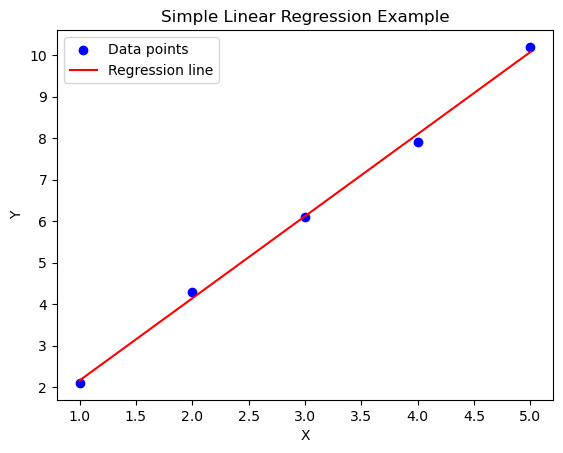

In [6]:
#6.)Implement a Python program to fit a Simple Linear Regression model to the following sample data: ● X = [1, 2, 3, 4, 5] ● Y = [2.1, 4.3, 6.1, 7.9, 10.2] Plot the regression line over the data points.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X) 
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)

plt.scatter(X, Y, color="blue", label="Data points")
plt.plot(X, Y_pred, color="red", label="Regression line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression Example")
plt.legend()
plt.show()

In [7]:
#7.)Fit a Multiple Linear Regression model on this sample data: ● Area = [1200, 1500, 1800, 2000] ● Rooms = [2, 3, 3, 4] ● Price = [250000, 300000, 320000, 370000] Check for multicollinearity using VIF and report the results.
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

data = pd.DataFrame({
    "Area": [1200, 1500, 1800, 2000],
    "Rooms": [2, 3, 3, 4],
    "Price": [250000, 300000, 320000, 370000]
})

X = data[["Area", "Rooms"]]
y = data["Price"]

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(X.columns, model.coef_)))

X_with_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_with_const.values, i)
    for i in range(X_with_const.shape[1])
]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)

Intercept: 103157.8947368422
Coefficients: {'Area': 63.15789473684208, 'Rooms': 34736.842105263146}

Variance Inflation Factor (VIF):
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


Intercept: 0.06000000000001293
Coefficients: [0.   1.94 0.2 ]


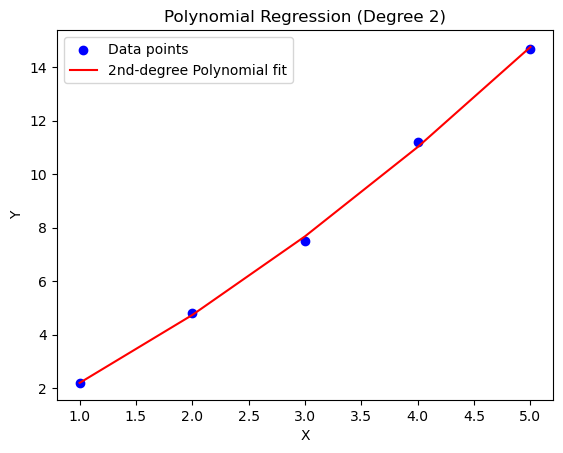

In [8]:
#8.)Implement polynomial regression on the following data: ● X = [1, 2, 3, 4, 5]● Y = [2.2, 4.8, 7.5, 11.2, 14.7] Fit a 2nd-degree polynomial and plot the resulting curve. (Include your Python code and output in the code box below.) 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

Y_pred = model.predict(X_poly)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

plt.scatter(X, Y, color="blue", label="Data points")
plt.plot(X, Y_pred, color="red", label="2nd-degree Polynomial fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()

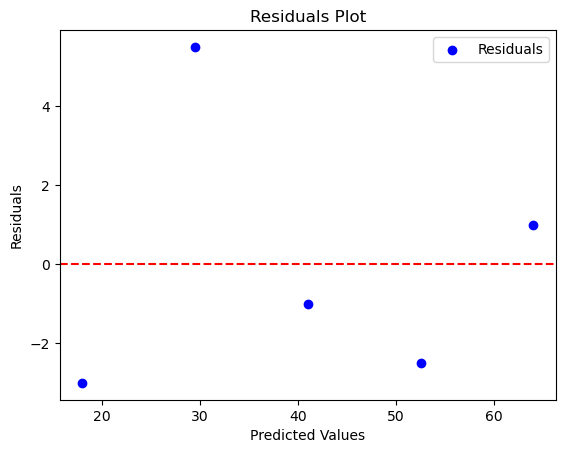

Residuals: [-3.   5.5 -1.  -2.5  1. ]


In [9]:
#9.)Create a residuals plot for a regression model trained on this data: ● X = [10, 20, 30, 40, 50] ● Y = [15, 35, 40, 50, 65] Assess heteroscedasticity by examining the spread of residuals. 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

residuals = Y - Y_pred

plt.scatter(Y_pred, residuals, color="blue", label="Residuals")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.legend()
plt.show()
print("Residuals:", residuals)

In [ ]:
#10.) Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust mode
#Heteroscedasticity (unequal residual variance):Apply log transformation to Price.Or use Weighted Least Squares / Robust Standard Errors.
#Multicollinearity (highly correlated predictors):Check VIF and drop/merge correlated features (e.g., Area & Rooms).Or use Ridge/Lasso Regression to stabilize coefficients.
#Location (categorical):Convert to one-hot encoding or target encoding.
Validation:

Use cross-validation and metrics (RMSE, MAE, R²) to ensure robustnes